In [0]:
data_url = "https://raw.githubusercontent.com/rani700/corona/master/datasets/train-week2.csv"

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv(data_url)

In [203]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [0]:
df = df.rename(columns={'Country_Region': 'Country', 'Province_State': 'State'})

In [0]:
df_new = df.iloc[:, [2, 3, 4, 5]].groupby(['Country', 'Date']).sum()

In [0]:
# Function to generate the time series data
def getData(country_name, N_min = 10, N_max = 15, O = 5, P_min = 10, P_max = 15):
  df_country = df_new.iloc[df_new.index.get_level_values('Country') == country_name]
  data = df_country.values[:, [0]]

  scaler = StandardScaler()
  scaler.fit(data)
  data = scaler.transform(data)


  N_min = N_min
  N_max = N_max
  O = O
  P_min = P_min
  P_max = P_max
  Dimension = 1

  X = []
  y = []

  for N in range(N_min, N_max+1):
    for P in range(P_min, P_max+1):
      for i in range(len(data) - (N + O + P) +1):
        N_pad = N_max - N
        P_pad = P_max - P

        temp1 = data[i : i+N]
        temp2 = [[0 for __ in range(Dimension)] for _ in range(N_pad)]
        temp3 = [[0 for __ in range(Dimension)] for _ in range(O)]
        temp4 = data[i+N+O : i+N+O+P]
        temp5 = [[0 for __ in range(Dimension)] for _ in range(P_pad)]

        tosave = np.append(np.append(np.append(np.append(temp1, temp2), temp3), temp4), temp5)
        X.append(tosave)
        y.append(data[i+N : i+N+O, 0])
  
  X = np.array(X)
  y = np.array(y)
  X = X.reshape(X.shape[0], Dimension, N_max+O+P_max)

  return X, y, scaler

In [0]:
Input = 20
X_india, y_india, scaler_india = getData('India', N_min = Input, N_max = Input, O = Output, P_min = 0, P_max = 0)
X_india = X_india.reshape(X_india.shape[0], X_india.shape[1]*X_india.shape[2])

In [468]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_india, y_india)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [469]:
reg.score(X_india, y_india)

0.9996515490228056

In [0]:
y_hat = scaler_india.inverse_transform(reg.predict(X_india))
y = scaler_india.inverse_transform(y_india)

In [471]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)

20.69457672762824

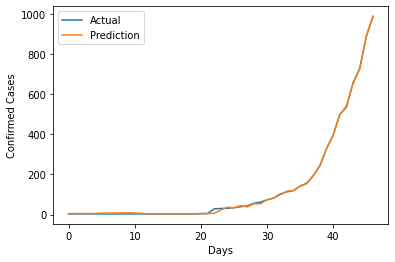

In [472]:
# plt.figure(figsize=(15, 5))
plt.plot(y, label="Actual")
plt.plot(y_hat, label="Prediction")
plt.xlabel("Days")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

In [0]:
df_india = df_new.iloc[df_new.index.get_level_values('Country') == 'India']

In [0]:
data = df_india.values[:, [0]]
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
data = data.reshape(1, -1)[0]

data_op = y_india.copy()
data_op = scaler_india.inverse_transform(data_op)

In [0]:
# Days after 28th march till 14 April is 17 so I predicted continously for 17 days
for i in range(17):
  test = data[-Input:]
  test = np.append(test, 0)
  prediction = reg.predict(test.reshape(1, -1))[0][0]
  data = np.append(data, prediction)
  data_op = np.append(data_op, scaler_india.inverse_transform([prediction]))

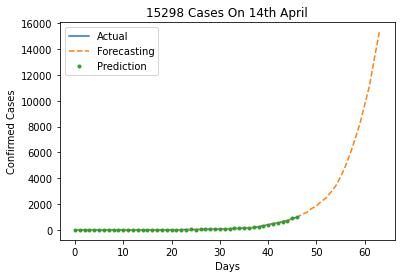

In [476]:
# plt.figure(figsize=(20, 5))
plt.plot(y, '-', label="Actual")
plt.plot(data_op, '--', label="Forecasting")
plt.plot(y_hat, '.', label="Prediction")
plt.xlabel("Days")
plt.ylabel("Confirmed Cases")
plt.title(str(int(data_op[-1]))+" Cases On 14th April")
plt.legend()
plt.show()